# Set up the environment
## Install and import packages
The following cells install certain required packages and components into your virtual environment for working through each of the steps in this particular programme. 
Read the comments (any text that follows "#") for details of each line. The comments will also contain details of what elements can be changed for your individual use case where applicable.

If the packages and modules are already installed and configured correctly in the virtual environment from previous workbooks, the workbook will automatically skip over these packages when the cells are run. 

In [ ]:
# Install required packages
! pip install -r ../requirements.txt

In [2]:
# This workbook uses the following modules. A short description of the purpose of the package is included for reference.

# import required packages
import pandas as pd # This module is used for working with datasets
import textstat # This module is used for running statistical analysis on text
# The following modules are used for representing data.
import matplotlib.pyplot as plt # This module is used for plotting graphs
import seaborn as sns # This module is used for plotting graphs

## Create the dataframe
Previous workbooks in this application save data generated data and analysis into the 'outputs' directory. The cell below creates a dataframe from a file generated and saved in the proceeding workbook ('outputs/GenAIinterpretation.csv'). However, the analysis in this workbook does not require quantitative data generated by the steps in any previous workbooks. The cells below perform analysis with any text, regardless of its source. 

In [4]:
# use pandas to read a CSV file
df = pd.read_csv('../outputs/GenAIinterpretation.csv')  # replace 'ouputs/GenAIinterpretation.csv' with your actual file path
df.head()

,museum_reference,title,description,date,style_culture,image,interpretation,GenAIinterpretation,tokens_used
0,A.1911.397.243,Firestick,"Firestick, wood with a reed sheath decorated w...",19th - 20th century,Australian Aboriginal,A.1911.397.243.png,A common method for making fire was to rub two...,"Firesticks such as this, with a reed sheath an...",1258
1,A.1898.372.39,Vessel,"Vessel (coolamon), roughly elliptical with rai...",19th century,Australian Aboriginal,A.1898.372.39.png,Coolamon are wooden dishes moulded over a fire...,"This coolamon, an elliptical wooden vessel fro...",1273
2,A.1911.397.159,Bag,"String bag (dilly-bag), plant fibre: Australas...",19th - 20th century,Australian Aboriginal,A.1911.397.159.png,"Across Australia's Northern Territory, Aborigi...","Woven from plant fibres, this Australian Abori...",1258
3,K.2002.825,Basket,"Basket, bicornual with handle, cane plant: Aus...",19th century,Australian Aboriginal,K.2002.825.png,Crescent-shaped cane baskets were unique to th...,"Handwoven from cane plant, this bicornual bask...",1250
4,V.2008.25,Basket,"Basket with black, red and yellow strips runni...",c. 2007,Pitjantjatjara,V.2008.25.png,Colourful coiled baskets are popular tourist i...,"Woven by Alison (Milyika) Carroll in 2007, thi...",1290


## Test the TextStats output
[TextStat](https://pypi.org/project/textstat/) is a library of predefined functions to calculate statistics from text. There are more functions available than the ones used in this analysis, but installing the module above makes all of them available in the virtual environment. A successful test in the next cell will show the results of different basic functions. 

In [ ]:
# Test the TextStat package with a sample text

# Define the sample text
sample_text = df['GenAIinterpretation'][0] # replace 0 with the index of the text you want to analyze

# Define a function to handle the results of various textstat functions
def get_text_stats(text):
    """Get all basic statistics for a text"""
    return {
        'words': textstat.lexicon_count(text, removepunct=True),
        'sentences': textstat.sentence_count(text),
        'syllables': textstat.syllable_count(text),
        'chars': textstat.char_count(text),
        'letters': textstat.letter_count(text),
        'average sentence length': textstat.words_per_sentence(text),
        'average syllables per word': textstat.avg_syllables_per_word(text)
    }

# Display the text and the results
display(sample_text)
get_text_stats(sample_text)

'Firesticks such as this, with a reed sheath and Abrus precatorius seeds, were used by Australian Aboriginal peoples in daily life for creating fire—a vital source of warmth, light, and sustenance. The decorated sheath honours its role and the ingenuity of its makers, connecting generations through tradition and skill. How might this small object have shaped stories around the fire?'

{'words': 60,
 'sentences': 3,
 'syllables': 97,
 'chars': 325,
 'letters': 316,
 'average sentence length': 20.0,
 'average syllables per word': 1.6166666666666667}

# Use the TextStats tool
The following cell calculates statistics for each interpretive text produced by the museum and produced by Generative AI using the TextStats library of functions and then saves the response alongside the collection metadata and interpretation in a dataframe for further analysis.

In [ ]:
# Calculate statistics for each text in the dataframe using TextStat.

# Create lists to store the results of TextStats
wordCount = []
GenAIwordCount = []
sentenceCount = []
GenAIsentenceCount = []
fleschReadingEase = []
genAIfleschReadingEase = []
mcalpineEFLAW = []
genAImcalpineEFLAW = []

# Apply lexicon_count function to the museum-generated interpretation and extend the list with the results
wordCount.extend(
    df['interpretation'].apply(textstat.lexicon_count, removepunct=True)
)

# Apply lexicon_count function to the Generative AI interpretation and extend the list with the results
GenAIwordCount.extend(
    df['GenAIinterpretation'].apply(textstat.lexicon_count, removepunct=True)
)
# Apply sentence_count to the museum-generated interpretation and extend the list with the results
sentenceCount.extend(
    df['interpretation'].apply(textstat.sentence_count)
)

# Apply sentence_count to the Generative AI interpretation and extend the list with the results
GenAIsentenceCount.extend(
    df['GenAIinterpretation'].apply(textstat.sentence_count)
)

# Apply flesch_reading_ease to the museum-generated interpretation and extend the list with the results
fleschReadingEase.extend(
    df['interpretation'].apply(textstat.flesch_reading_ease)
)
# Apply flesch_reading_ease to the Generative AI interpretation and extend the list with the results
genAIfleschReadingEase.extend(
    df['GenAIinterpretation'].apply(textstat.flesch_reading_ease)
)  
# Apply mcalpine_eflaw to the museum-generated interpretation and extend the list with the results
mcalpineEFLAW.extend(
    df['interpretation'].apply(textstat.mcalpine_eflaw)
)
# Apply mcalpine_eflaw to the Generative AI interpretation and extend the list with the results
genAImcalpineEFLAW.extend(
    df['GenAIinterpretation'].apply(textstat.mcalpine_eflaw)
)

# add the responses to the dataframe
df['wordCount'] = wordCount
df['GenAIwordCount'] = GenAIwordCount
df['sentenceCount'] = sentenceCount
df['GenAIsentenceCount'] = GenAIsentenceCount
df['fleschReadingEase'] = fleschReadingEase
df['genAIfleschReadingEase'] = genAIfleschReadingEase
df['mcalpineEFLAW'] = mcalpineEFLAW
df['genAImcalpineEFLAW'] = genAImcalpineEFLAW

# print the dataframe with the interpretations
df.head()

,museum_reference,title,description,date,style_culture,image,interpretation,GenAIinterpretation,tokens_used,wordCount,GenAIwordCount,sentenceCount,GenAIsentenceCount,fleschReadingEase,genAIfleschReadingEase,mcalpineEFLAW,genAImcalpineEFLAW
0,A.1911.397.243,Firestick,"Firestick, wood with a reed sheath decorated w...",19th - 20th century,Australian Aboriginal,A.1911.397.243.png,A common method for making fire was to rub two...,"Firesticks such as this, with a reed sheath an...",1258,29,60,2,3,72.510603,49.765000,20.500000,25.666667
1,A.1898.372.39,Vessel,"Vessel (coolamon), roughly elliptical with rai...",19th century,Australian Aboriginal,A.1898.372.39.png,Coolamon are wooden dishes moulded over a fire...,"This coolamon, an elliptical wooden vessel fro...",1273,25,67,2,4,68.939500,24.421810,16.500000,21.250000
2,A.1911.397.159,Bag,"String bag (dilly-bag), plant fibre: Australas...",19th - 20th century,Australian Aboriginal,A.1911.397.159.png,"Across Australia's Northern Territory, Aborigi...","Woven from plant fibres, this Australian Abori...",1258,49,61,3,4,71.126054,42.959529,21.666667,19.500000
3,K.2002.825,Basket,"Basket, bicornual with handle, cane plant: Aus...",19th century,Australian Aboriginal,K.2002.825.png,Crescent-shaped cane baskets were unique to th...,"Handwoven from cane plant, this bicornual bask...",1250,48,62,3,4,76.032500,41.005726,21.333333,19.500000
4,V.2008.25,Basket,"Basket with black, red and yellow strips runni...",c. 2007,Pitjantjatjara,V.2008.25.png,Colourful coiled baskets are popular tourist i...,"Woven by Alison (Milyika) Carroll in 2007, thi...",1290,48,62,3,3,51.357500,18.022849,21.666667,26.333333


# Save the dataframe
Dataframes work very well within the virtual environment for a wide variety of computational tasks, but they are not designed for long-term data storage or for sharing and distribution. The following cell takes the data from the dataframe and store it in a persistent file format.

After saving the results of the workbook with the following cell, users can close the workbook and resume subsequent analysis later by re-loading the data using the first cell in the next section. 

In [ ]:
# use pandas to write a CSV file
df.to_csv('../outputs/textStatistics.csv', index=False)  # replace 'outputs/textStatistics.csv' with the preferred file path

# Visualise the results
The following cells use different methods to produce statistical graphics and tables using the results from analysing the interpretive texts using the methods in this workbook. These elements can be used to explore further aspects of the data through quantitative analysis.

The following visualisations use the [Seaborn Boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html). The full configuration instructions are available in the documentation for the function linked above.

In [5]:
# This cell re-imports the CSV file that was generated in the immediately preceding cell. This is not necessary if users run all cells in this workbook from top to bottom. 
df = pd.read_csv('../outputs/textStatistics.csv')  # replace 'outputs/textStatistics.csv' with your actual file path
df.head()

,museum_reference,title,description,date,style_culture,image,interpretation,GenAIinterpretation,tokens_used,wordCount,GenAIwordCount,sentenceCount,GenAIsentenceCount,fleschReadingEase,genAIfleschReadingEase,mcalpineEFLAW,genAImcalpineEFLAW
0,A.1911.397.243,Firestick,"Firestick, wood with a reed sheath decorated w...",19th - 20th century,Australian Aboriginal,A.1911.397.243.png,A common method for making fire was to rub two...,"Firesticks such as this, with a reed sheath an...",1258,29,60,2,3,72.510603,49.765000,20.500000,25.666667
1,A.1898.372.39,Vessel,"Vessel (coolamon), roughly elliptical with rai...",19th century,Australian Aboriginal,A.1898.372.39.png,Coolamon are wooden dishes moulded over a fire...,"This coolamon, an elliptical wooden vessel fro...",1273,25,67,2,4,68.939500,24.421810,16.500000,21.250000
2,A.1911.397.159,Bag,"String bag (dilly-bag), plant fibre: Australas...",19th - 20th century,Australian Aboriginal,A.1911.397.159.png,"Across Australia's Northern Territory, Aborigi...","Woven from plant fibres, this Australian Abori...",1258,49,61,3,4,71.126054,42.959529,21.666667,19.500000
3,K.2002.825,Basket,"Basket, bicornual with handle, cane plant: Aus...",19th century,Australian Aboriginal,K.2002.825.png,Crescent-shaped cane baskets were unique to th...,"Handwoven from cane plant, this bicornual bask...",1250,48,62,3,4,76.032500,41.005726,21.333333,19.500000
4,V.2008.25,Basket,"Basket with black, red and yellow strips runni...",c. 2007,Pitjantjatjara,V.2008.25.png,Colourful coiled baskets are popular tourist i...,"Woven by Alison (Milyika) Carroll in 2007, thi...",1290,48,62,3,3,51.357500,18.022849,21.666667,26.333333


In [ ]:
# Display the descriptive statistics for the text statistics columns in the dataframe
df[['wordCount','GenAIwordCount','sentenceCount','GenAIsentenceCount','fleschReadingEase','genAIfleschReadingEase','mcalpineEFLAW','genAImcalpineEFLAW']].describe()

,wordCount,GenAIwordCount,sentenceCount,GenAIsentenceCount,fleschReadingEase,genAIfleschReadingEase,mcalpineEFLAW,genAImcalpineEFLAW
count,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000
mean,40.975806,67.040323,2.758065,3.725806,60.416433,44.810214,20.355780,23.609543
std,13.222587,7.234065,0.913948,0.589042,13.844563,10.113015,4.946537,3.404693
min,11.000000,54.000000,1.000000,3.000000,25.356471,18.022849,13.000000,16.400000
25%,28.500000,61.750000,2.000000,3.000000,50.596726,38.222833,16.750000,21.187500
50%,44.500000,66.500000,3.000000,4.000000,61.015667,44.633040,19.583333,23.250000
75%,49.250000,71.000000,3.000000,4.000000,69.070603,51.006863,22.375000,25.687500
max,82.000000,90.000000,5.000000,6.000000,91.533478,72.008380,40.000000,34.666667


In [4]:
# Prepare the DataFrame for word count comparison
# Create a new DataFrame with the word counts for both Museum and Generative AI
df_wordCount = df[['wordCount', 'GenAIwordCount']].copy()
df_wordCount.rename(columns={'wordCount': 'Museum', 'GenAIwordCount': 'Generative AI'}, inplace=True) # renames the columns for clarity in plotting

# Prepare the DataFrame for Flesh Reading Ease score comparison
# Create a new DataFrame with the Flesch Reading Ease scores for both Museum and Generative AI
df_flesch = df[['fleschReadingEase', 'genAIfleschReadingEase']].copy()
df_flesch.rename(columns={'fleschReadingEase': 'Museum', 'genAIfleschReadingEase': 'Generative AI'}, inplace=True) # renames the columns for clarity in plotting 

# Prepare the DataFrame for McAlpine EFLAW Readability score comparison
# Create a new DataFrame with the McAlpine EFLAW scores for both Museum and Generative AI
df_mcalpine = df[['mcalpineEFLAW', 'genAImcalpineEFLAW']].copy()
df_mcalpine.rename(columns={'mcalpineEFLAW': 'Museum', 'genAImcalpineEFLAW': 'Generative AI'}, inplace=True) # renames the columns for clarity in plotting

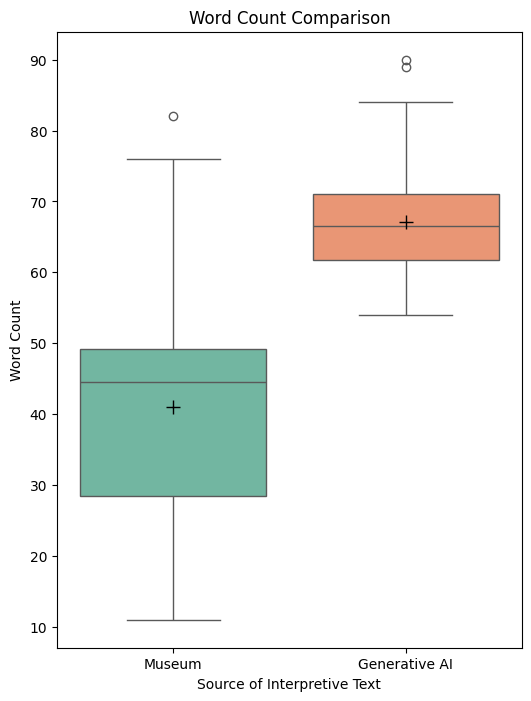

In [ ]:
# Plots a vertical boxplot for word count comparison
fig, wc = plt.subplots(figsize=(6,8))
wc = sns.boxplot(
    x="variable", 
    y="value", 
    data=pd.melt(df_wordCount),
    hue='variable',
    palette='Set2',
    showmeans=True,
    meanprops={"marker": "+", "markeredgecolor": "black", "markersize": 10},
)
wc.set_title('Word Count Comparison')
wc.set_xlabel('Source of Interpretive Text')
wc.set_ylabel('Word Count')
plt.show()

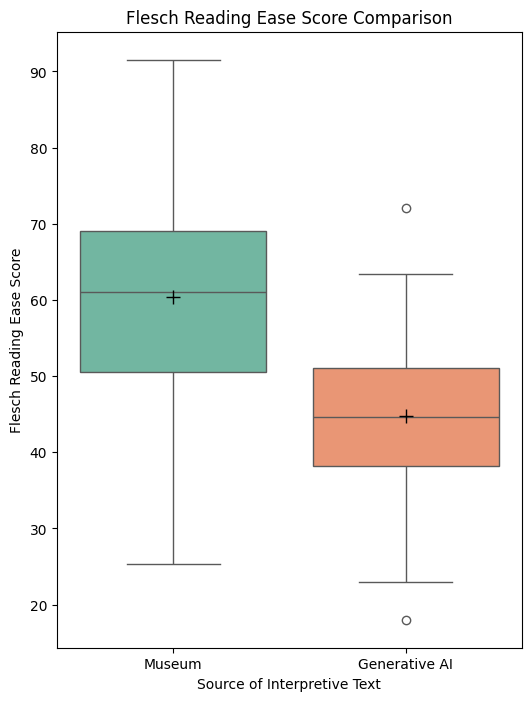

In [ ]:
# Plots a vertical boxplot for Flesch Reading Ease score comparison
fig, fre = plt.subplots(figsize=(6,8))
fre = sns.boxplot(
    x="variable", 
    y="value", 
    data=pd.melt(df_flesch),
    hue='variable',
    palette='Set2',
    showmeans=True,
    meanprops={"marker": "+", "markeredgecolor": "black", "markersize": 10}
)
fre.set_title('Flesch Reading Ease Score Comparison')
fre.set_xlabel('Source of Interpretive Text')
fre.set_ylabel('Flesch Reading Ease Score')
plt.show()

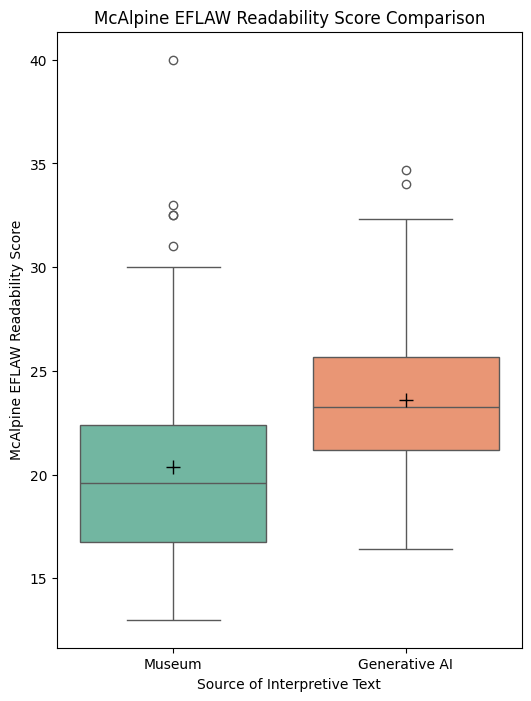

In [ ]:
# Plots a vertical boxplot for McAlpine EFLAW Readability score comparison
fig, mer = plt.subplots(figsize=(6,8))
mer = sns.boxplot(
    x="variable", 
    y="value", 
    data=pd.melt(df_mcalpine),
    hue='variable',
    palette='Set2',
    showmeans=True,
    meanprops={"marker": "+", "markeredgecolor": "black", "markersize": 10}
)
mer.set_title('McAlpine EFLAW Readability Score Comparison')
mer.set_xlabel('Source of Interpretive Text')
mer.set_ylabel('McAlpine EFLAW Readability Score')
plt.show()

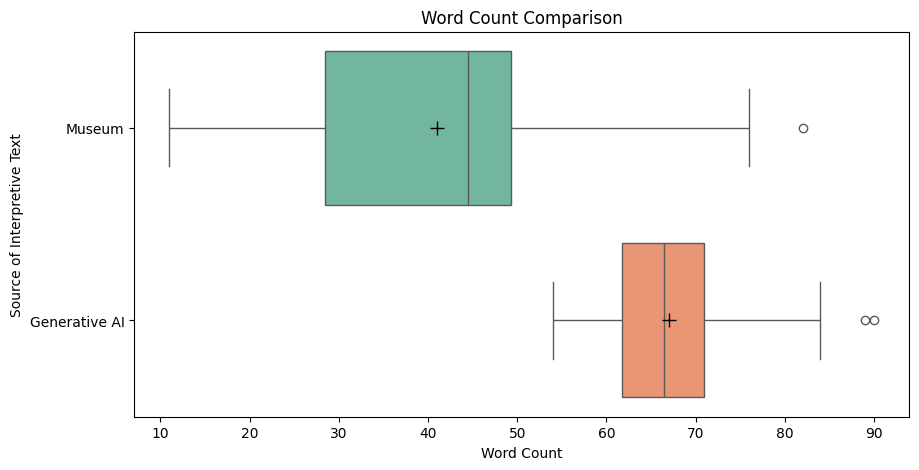

In [5]:
# Plots a horizontal boxplot for word count comparison
fig, wc = plt.subplots(figsize=(10,5))
wc = sns.boxplot( 
    x="value", 
    y="variable", 
    data=pd.melt(df_wordCount),
    hue='variable',
    palette='Set2',
    showmeans=True,
    meanprops={"marker": "+", "markeredgecolor": "black", "markersize": 10},
    orient='h'  # horizontal orientation for better readability
)
wc.set_title('Word Count Comparison')
wc.set_ylabel('Source of Interpretive Text')
wc.set_xlabel('Word Count')
plt.show()

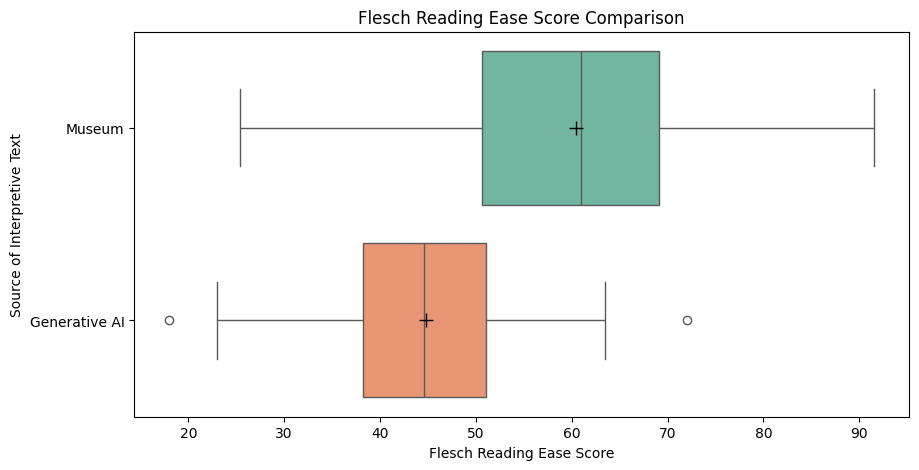

In [ ]:
# Plots a horizontal boxplot for Flesch Reading Ease score comparison
fig, fre = plt.subplots(figsize=(10,5))
fre = sns.boxplot(
    x="value", 
    y="variable", 
    data=pd.melt(df_flesch),
    hue='variable',
    palette='Set2',
    showmeans=True,
    meanprops={"marker": "+", "markeredgecolor": "black", "markersize": 10}
)
fre.set_title('Flesch Reading Ease Score Comparison')
fre.set_ylabel('Source of Interpretive Text')
fre.set_xlabel('Flesch Reading Ease Score')
plt.show()

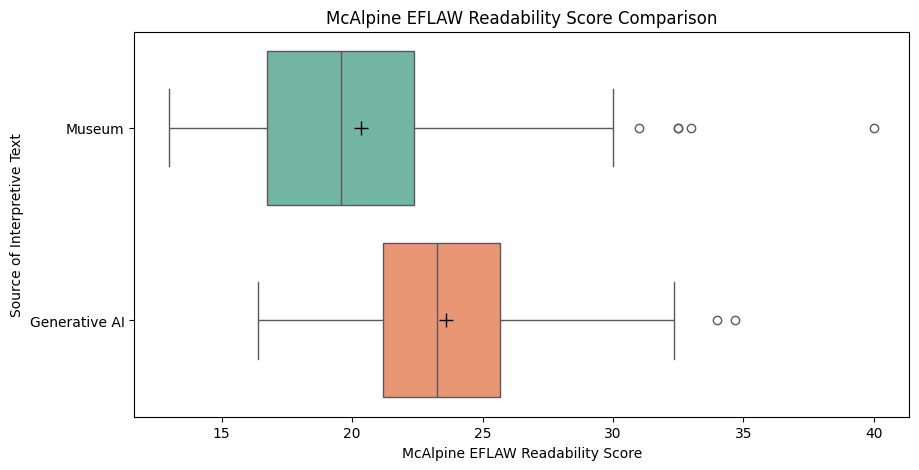

In [ ]:
# Plots a horizontal boxplot for McAlpine EFLAW Readability score comparison
fig, mer = plt.subplots(figsize=(10,5))
mer = sns.boxplot(
    x="value", 
    y="variable", 
    data=pd.melt(df_mcalpine),
    hue='variable',
    palette='Set2',
    showmeans=True,
    meanprops={"marker": "+", "markeredgecolor": "black", "markersize": 10}
)
mer.set_title('McAlpine EFLAW Readability Score Comparison')
mer.set_ylabel('Source of Interpretive Text')
mer.set_xlabel('McAlpine EFLAW Readability Score')
plt.show()

Go to the Workbooks directory and open the workbook titled "3_sentiment.ipynb" to continue with the analysis.